In [1]:
#FINAL PROJECT

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/Project/stroke_risk_dataset.csv")
df = df.drop(columns=["Stroke Risk (%)", "Age"])

In [4]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1


In [5]:
df.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#missing values
print(df.isnull().sum())

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
At Risk (Binary)                  0
dtype: int64


In [7]:
#variable type
print(df.dtypes)

Chest Pain                        int64
Shortness of Breath               int64
Irregular Heartbeat               int64
Fatigue & Weakness                int64
Dizziness                         int64
Swelling (Edema)                  int64
Pain in Neck/Jaw/Shoulder/Back    int64
Excessive Sweating                int64
Persistent Cough                  int64
Nausea/Vomiting                   int64
High Blood Pressure               int64
Chest Discomfort (Activity)       int64
Cold Hands/Feet                   int64
Snoring/Sleep Apnea               int64
Anxiety/Feeling of Doom           int64
At Risk (Binary)                  int64
dtype: object


In [8]:
X = df.drop(columns=["At Risk (Binary)"])  # Features
y = df["At Risk (Binary)"]  # Target Variable

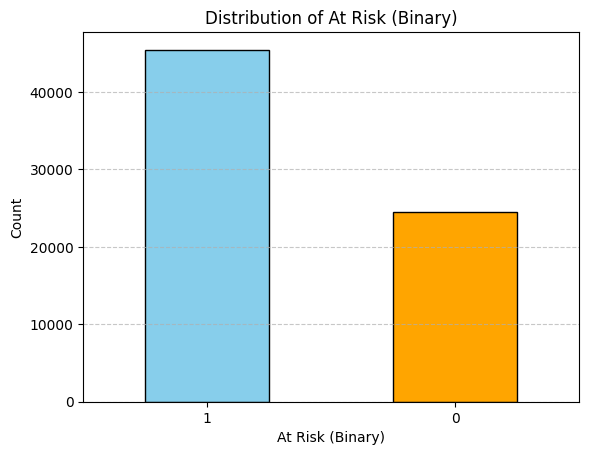

In [9]:

df["At Risk (Binary)"].value_counts().plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('Distribution of At Risk (Binary)')
plt.xlabel('At Risk (Binary)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

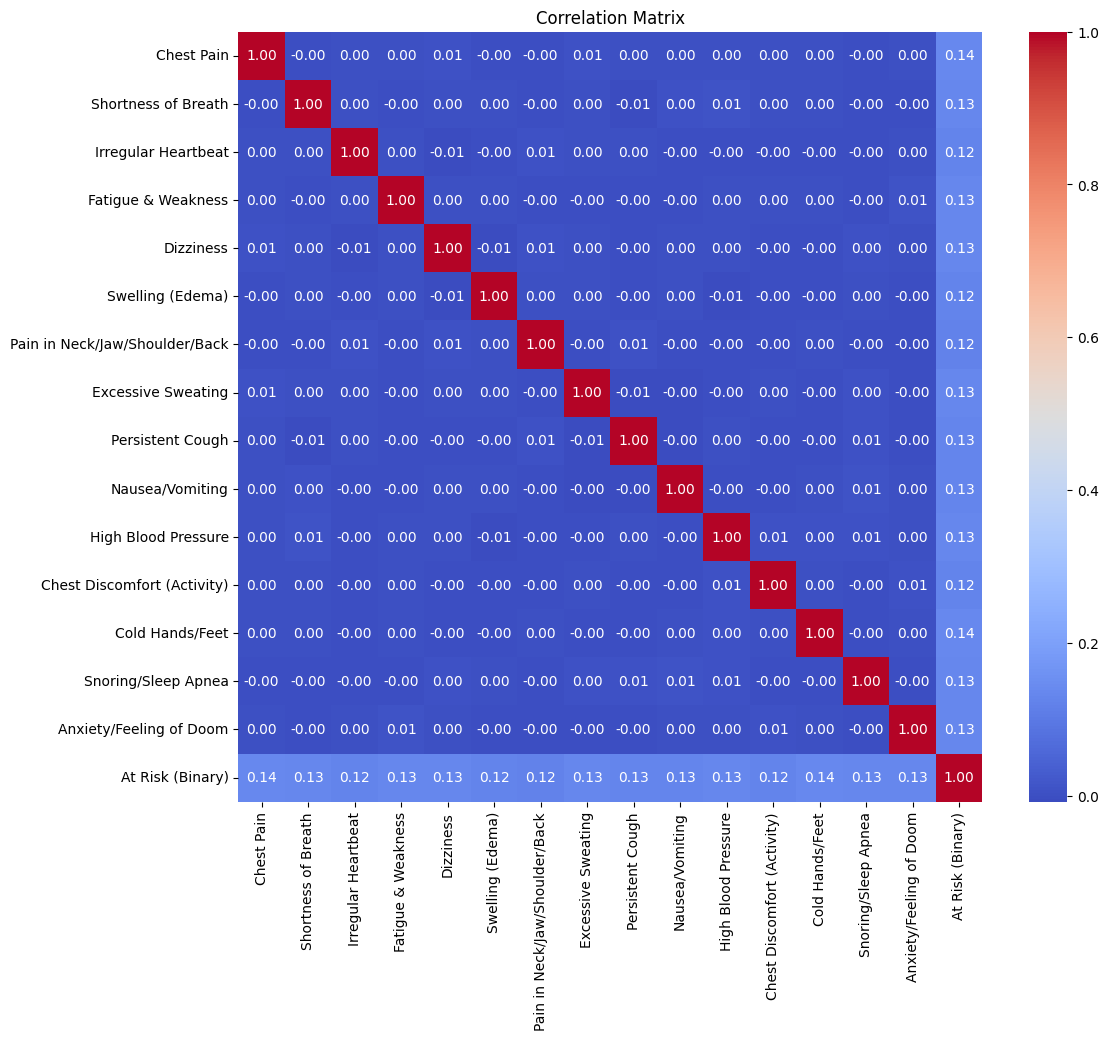

In [10]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

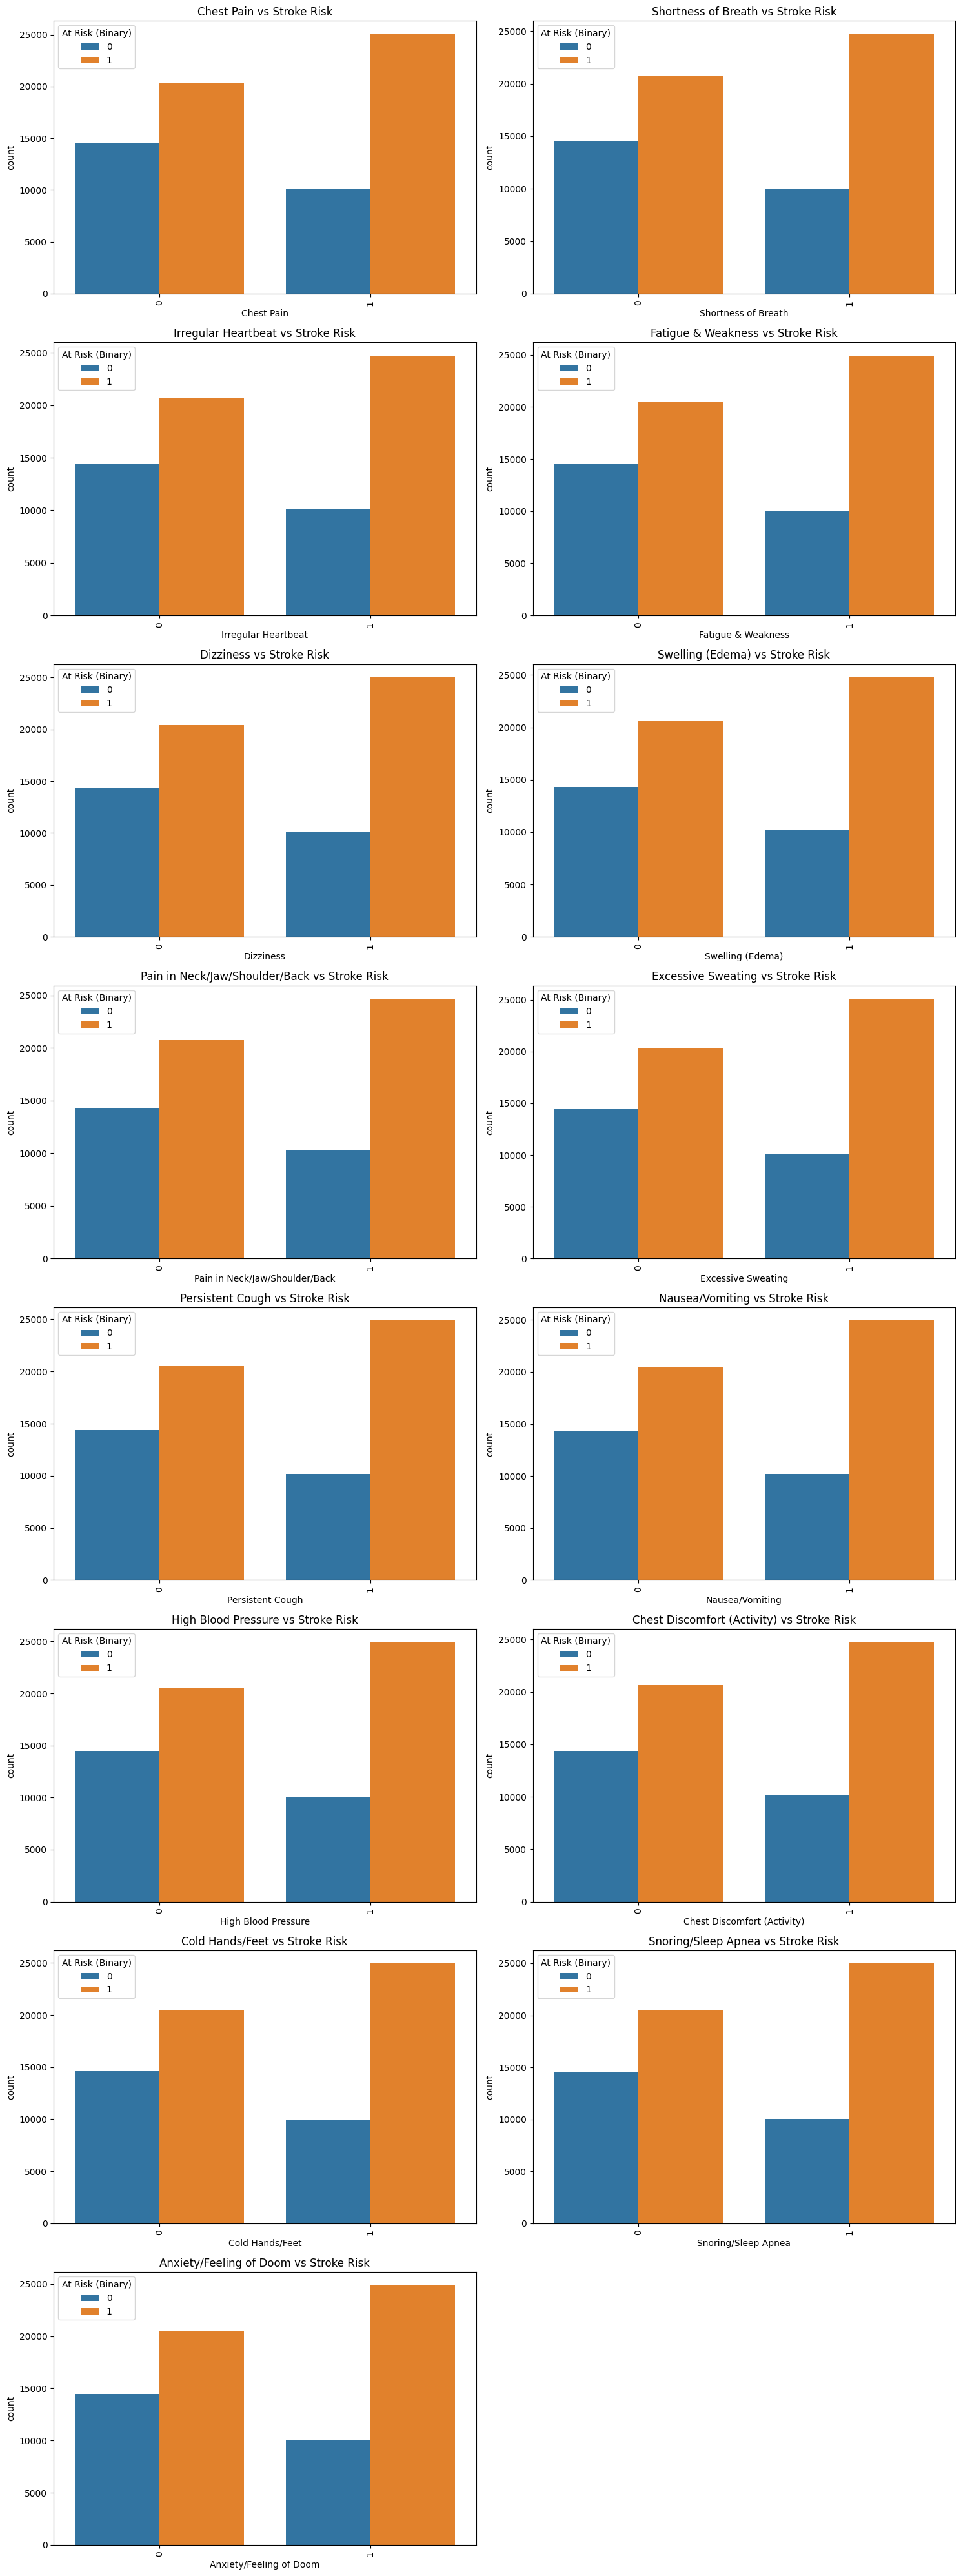

In [11]:
df_categorical = df.select_dtypes(include=['int64', 'float64']).drop(columns=['At Risk (Binary)'], errors='ignore')

# Get the number of numerical columns
col_count = len(df_categorical.columns)
nrows = (col_count + 1) // 2  # Ensure enough rows for subplots
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten() if col_count > 1 else [axes]

# Plot each numerical variable against Early_Prediction
for i, column in enumerate(df_categorical.columns):
    sns.countplot(x=df[column], hue=df['At Risk (Binary)'], ax=axes[i])
    axes[i].set_title(f'{column} vs Stroke Risk')
    axes[i].tick_params(axis='x', rotation=90)

# Remove unused subplots if the number of numerical columns is odd
if col_count % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [12]:
#create testing and training data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

Logistic Regression Accuracy: 0.7368
Confusion Matrix for Logistic Regression:
[[ 4033  3299]
 [ 2229 11439]]


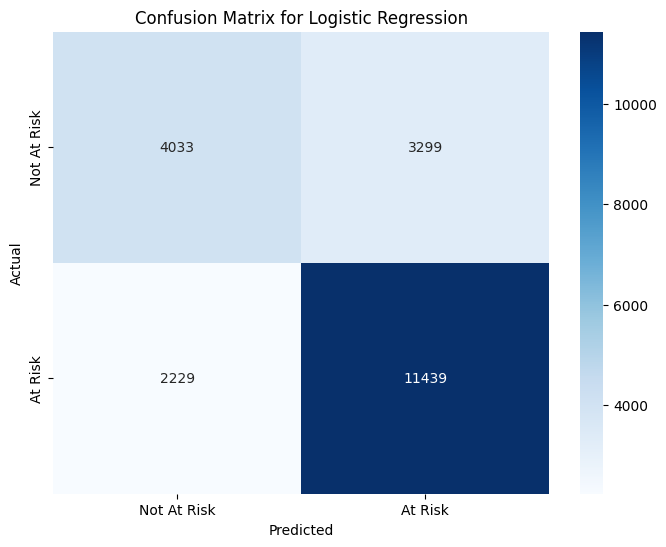

In [13]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=86)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K=3, K-Nearest Neighbors Accuracy: 0.6728
K=5, K-Nearest Neighbors Accuracy: 0.6882
K=7, K-Nearest Neighbors Accuracy: 0.6979
K=9, K-Nearest Neighbors Accuracy: 0.7062
K=11, K-Nearest Neighbors Accuracy: 0.7070
K=13, K-Nearest Neighbors Accuracy: 0.7104


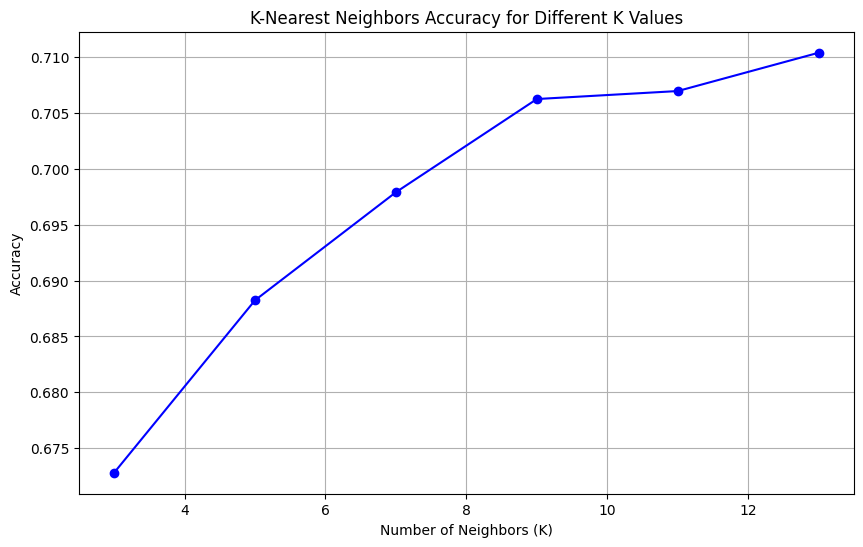

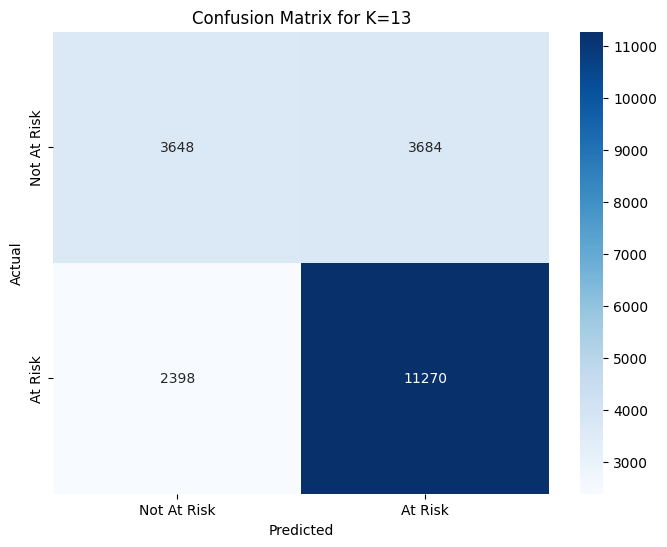

Classification Report for K=13:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55      7332
           1       0.75      0.82      0.79     13668

    accuracy                           0.71     21000
   macro avg       0.68      0.66      0.67     21000
weighted avg       0.70      0.71      0.70     21000



In [14]:
# K-Nearest Neighbors
k_values = [3, 5, 7, 9, 11, 13]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy_knn)
    print(f"K={k}, K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('K-Nearest Neighbors Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
# Confusion Matrix and Classification Report for the best K
best_k_index = accuracies.index(max(accuracies))
best_k = k_values[best_k_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title(f"Confusion Matrix for K={best_k}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report for K={best_k}:\n{class_report}")


Decision Tree Accuracy: 0.6508
Confusion Matrix for Decision Tree:
[[4261 3071]
 [4262 9406]]


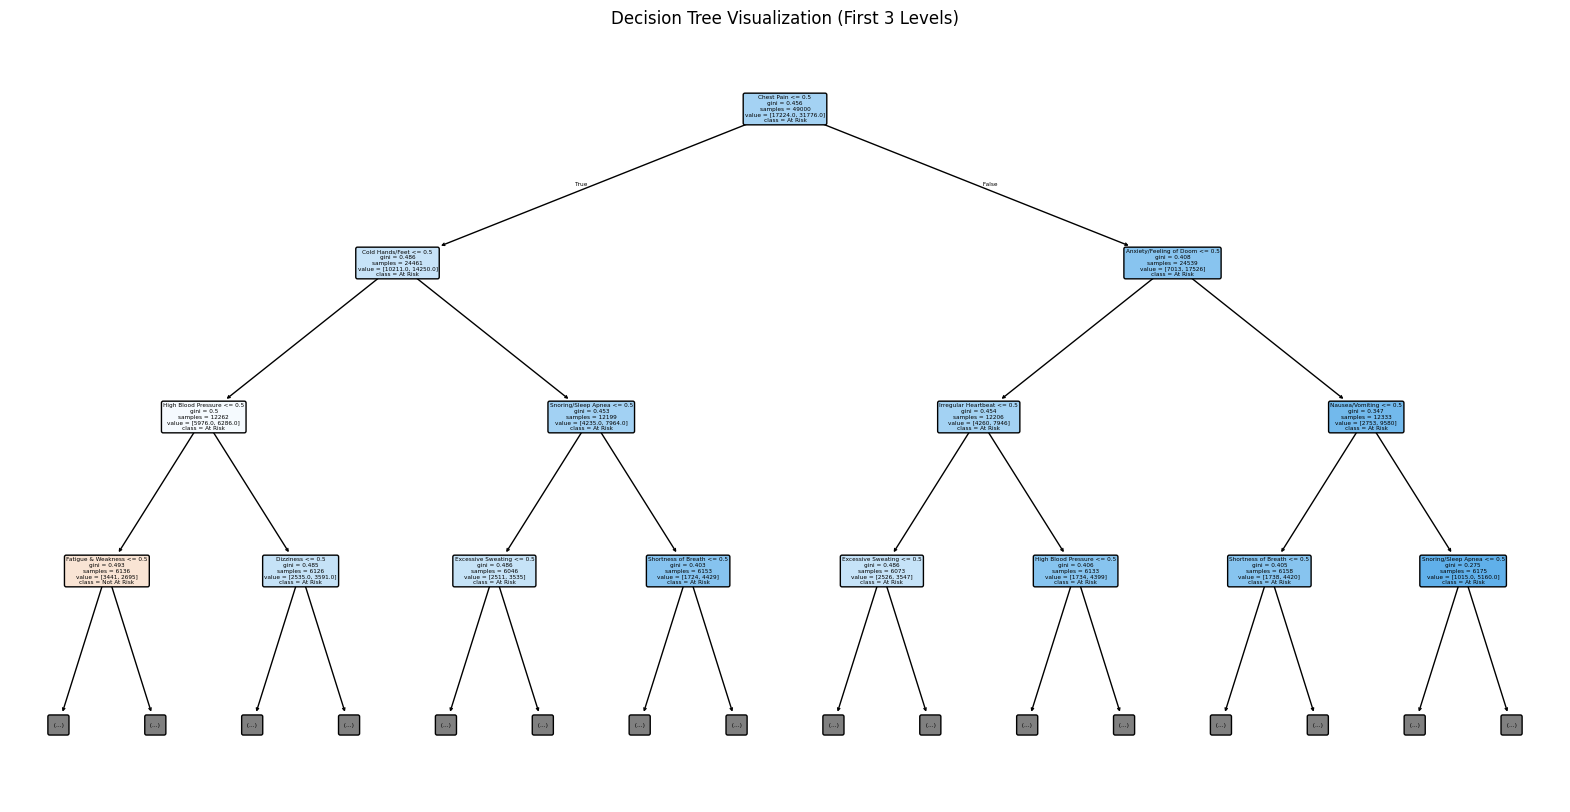

In [15]:
from sklearn.tree import plot_tree


# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

# Plot the Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["Not At Risk", "At Risk"], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()


Random Forest Accuracy: 0.6831


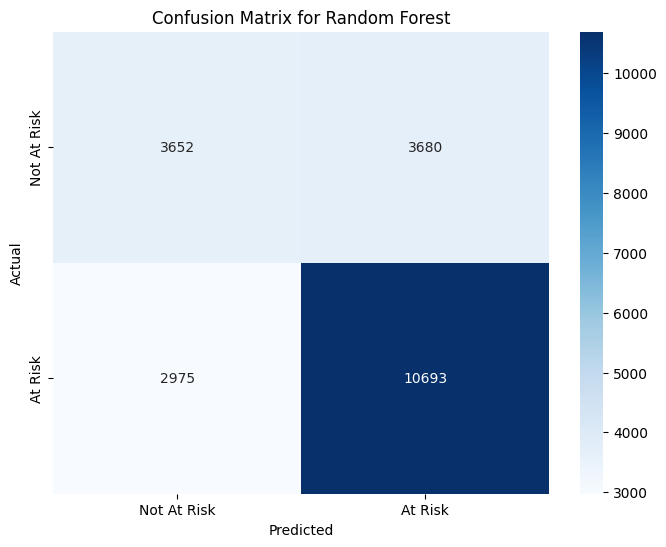

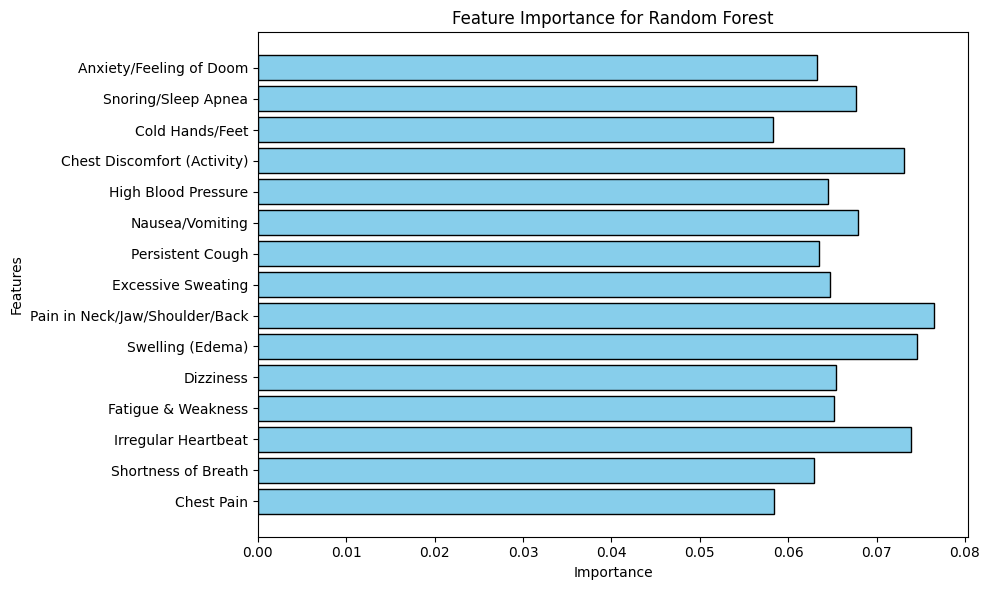

In [16]:
# Random Forest
random_forest = RandomForestClassifier(random_state=66)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importances = random_forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue', edgecolor='black')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Support Vector Machine Accuracy: 0.7293


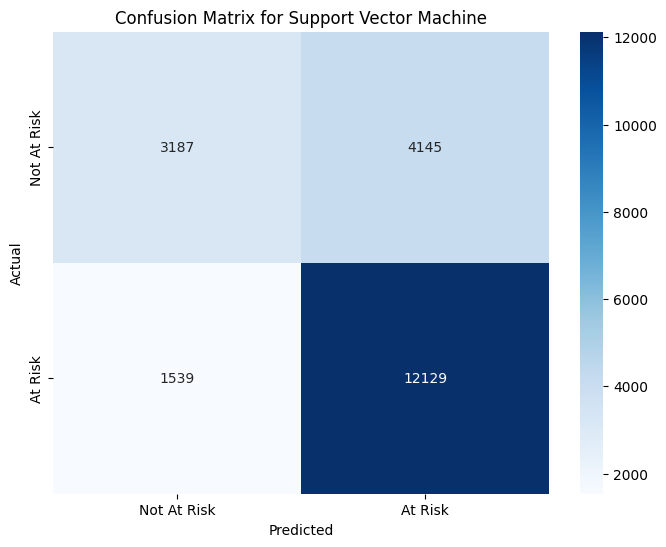

In [17]:
# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gaussian Naive Bayes Accuracy: 0.7361


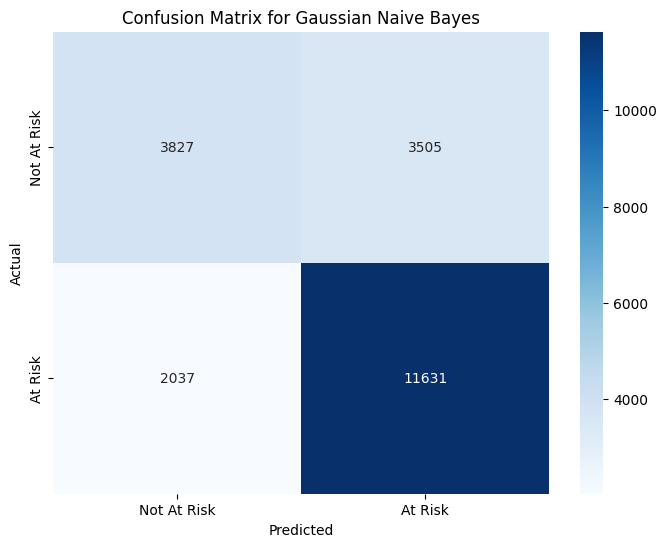

Categorical Naive Bayes Accuracy: 0.7356


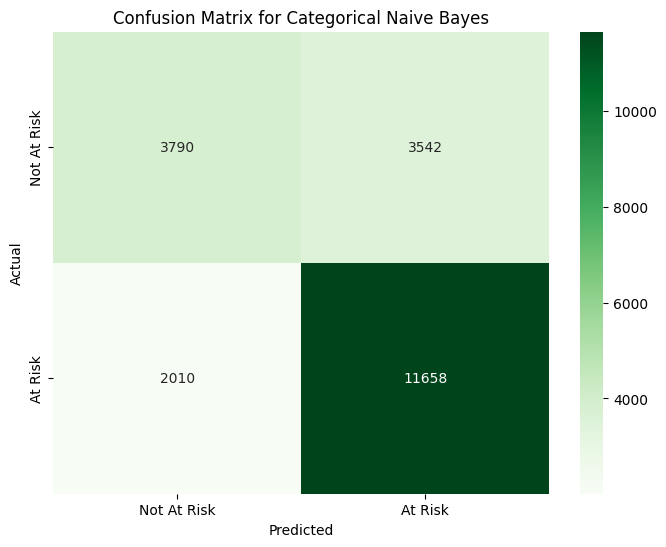

Comparison of Naive Bayes Models:
Gaussian Naive Bayes Accuracy: 0.7361
Categorical Naive Bayes Accuracy: 0.7356


In [18]:
from sklearn.naive_bayes import CategoricalNB

# Naive Bayes
# Gaussian Naive Bayes
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train, y_train)
y_pred_gaussian = naive_bayes_gaussian.predict(X_test)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gaussian:.4f}")

# Confusion Matrix for Gaussian Naive Bayes
conf_matrix_gaussian = confusion_matrix(y_test, y_pred_gaussian)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gaussian, annot=True, fmt="d", cmap="Blues", xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Categorical Naive Bayes

naive_bayes_categorical = CategoricalNB()
naive_bayes_categorical.fit(X_train, y_train)
y_pred_categorical = naive_bayes_categorical.predict(X_test)
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
print(f"Categorical Naive Bayes Accuracy: {accuracy_categorical:.4f}")

# Confusion Matrix for Categorical Naive Bayes
conf_matrix_categorical = confusion_matrix(y_test, y_pred_categorical)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_categorical, annot=True, fmt="d", cmap="Greens", xticklabels=["Not At Risk", "At Risk"], yticklabels=["Not At Risk", "At Risk"])
plt.title("Confusion Matrix for Categorical Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparison of Gaussian and Categorical Naive Bayes
print(f"Comparison of Naive Bayes Models:")
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gaussian:.4f}")
print(f"Categorical Naive Bayes Accuracy: {accuracy_categorical:.4f}")

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Initialize evaluation_metrics dictionary
evaluation_metrics = {}

# Add Training Score and Testing Score placeholders (if available, replace with actual values)
training_scores = {
    "Logistic Regression": logistic_regression.score(X_train, y_train),
    "K-Nearest Neighbors": knn.score(X_train, y_train),
    "Decision Tree": decision_tree.score(X_train, y_train),
    "Random Forest": random_forest.score(X_train, y_train),
    "Support Vector Machine": svm.score(X_train, y_train),
    "Naive Bayes": naive_bayes_gaussian.score(X_train, y_train)
}

# Add Training and Testing Scores to the evaluation metrics
models = {
    "Logistic Regression": y_pred_lr,
    "K-Nearest Neighbors": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Support Vector Machine": y_pred_svm,
    "Naive Bayes": y_pred_gaussian
}

for model_name, y_pred in models.items():
    evaluation_metrics[model_name] = {}
    evaluation_metrics[model_name]["Training Score"] = training_scores[model_name]
    evaluation_metrics[model_name]["Accuracy"] = accuracy_score(y_test, y_pred)
    evaluation_metrics[model_name]["F1-Score"] = f1_score(y_test, y_pred, average="binary")
    evaluation_metrics[model_name]["Precision"] = precision_score(y_test, y_pred, average="binary")
    evaluation_metrics[model_name]["Recall"] = recall_score(y_test, y_pred, average="binary")

# Convert the evaluation metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(evaluation_metrics).T

# Reorder columns for the desired format
metrics_df = metrics_df[["Training Score", "Accuracy", "F1-Score", "Precision", "Recall"]]

# Sort by F1-Score (or any other metric you prefer)
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False)

# Print the DataFrame in the specified format
print(metrics_df.to_string(index=True))


                        Training Score  Accuracy  F1-Score  Precision    Recall
Support Vector Machine        0.748592  0.729333  0.810166   0.745299  0.887401
Naive Bayes                   0.738102  0.736095  0.807596   0.768433  0.850966
Logistic Regression           0.738388  0.736762  0.805393   0.776157  0.836918
K-Nearest Neighbors           0.760878  0.710381  0.787506   0.753645  0.824554
Random Forest                 0.861898  0.683095  0.762669   0.743964  0.782338
Decision Tree                 0.861898  0.650810  0.719526   0.753867  0.688177
